📂 Please upload your dataset (CSV file)


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneS

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


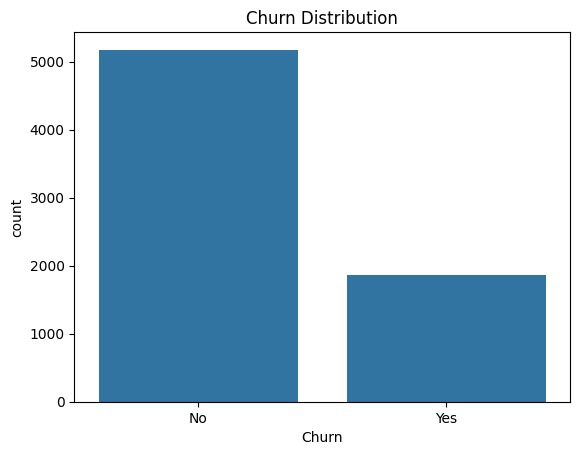

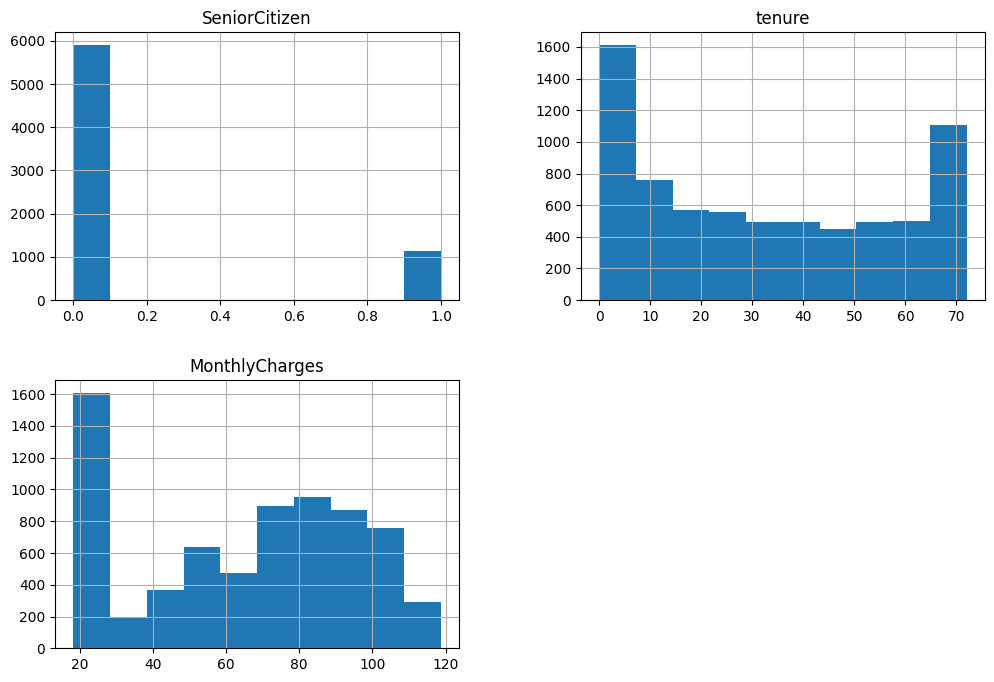

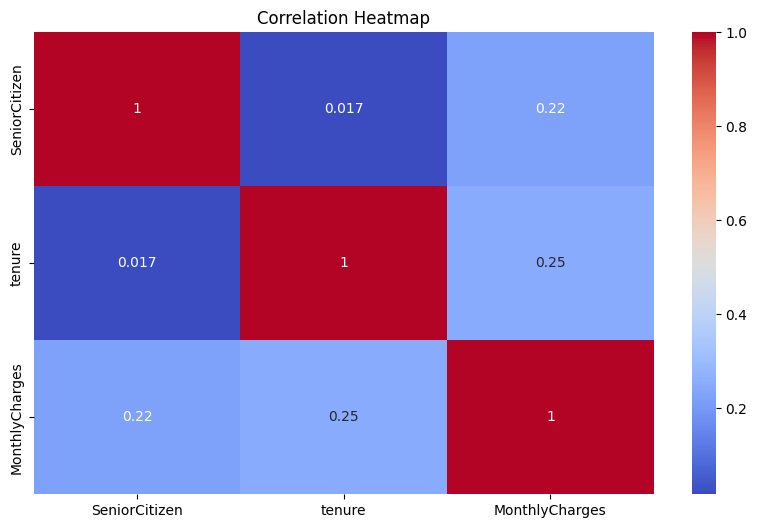

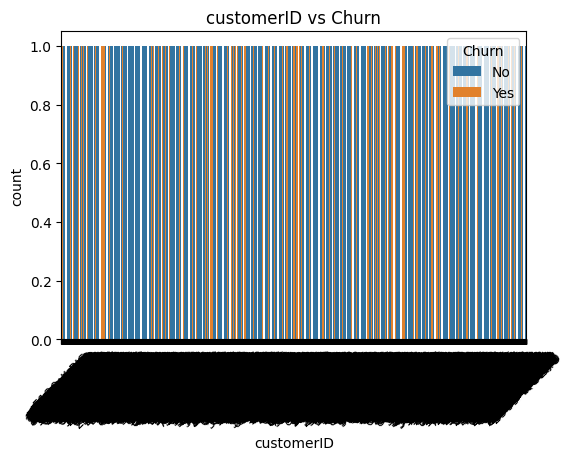

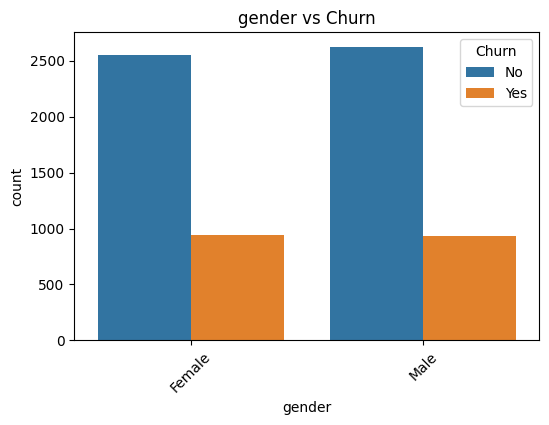

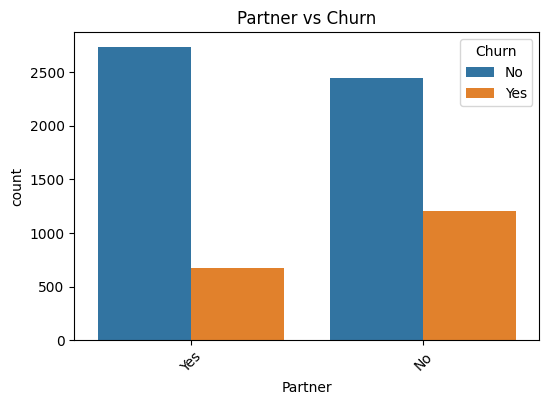

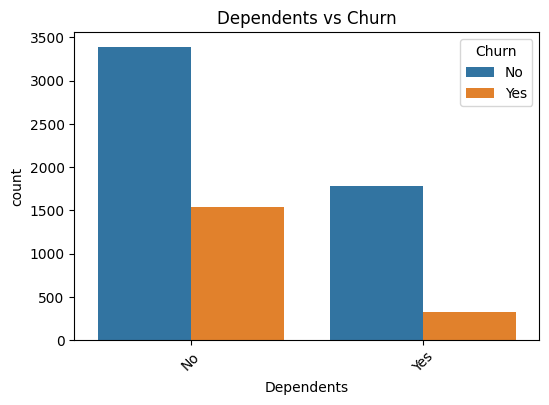

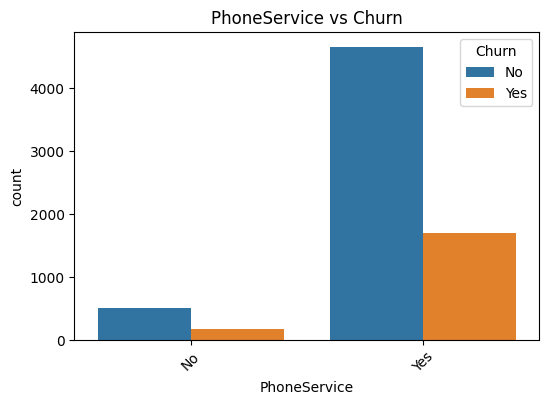

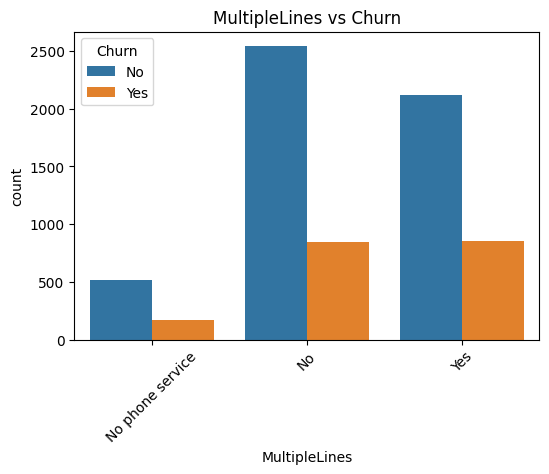

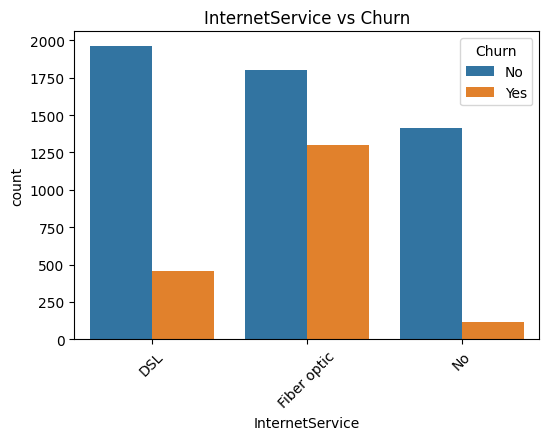

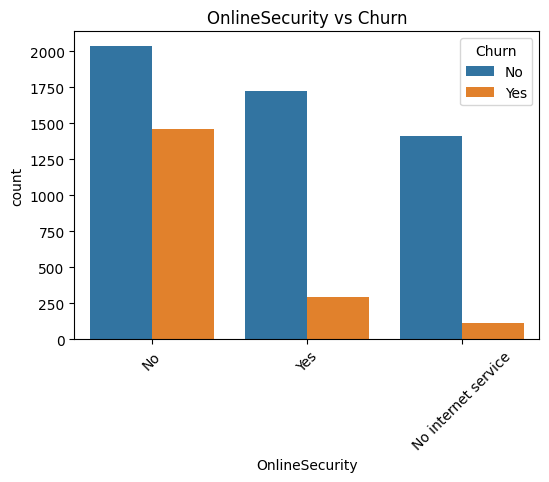

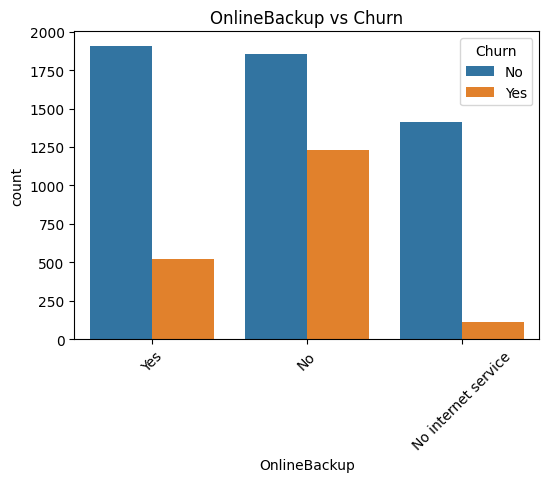

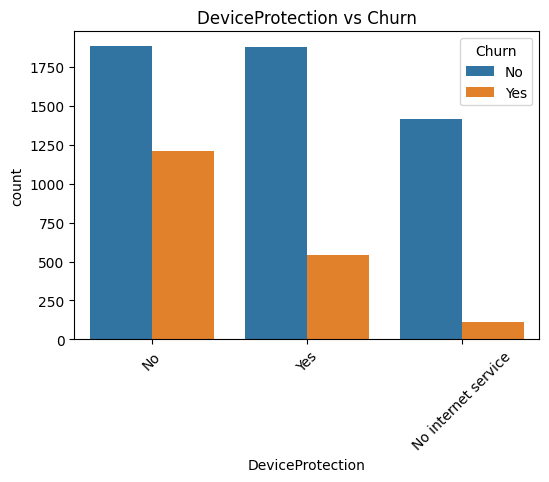

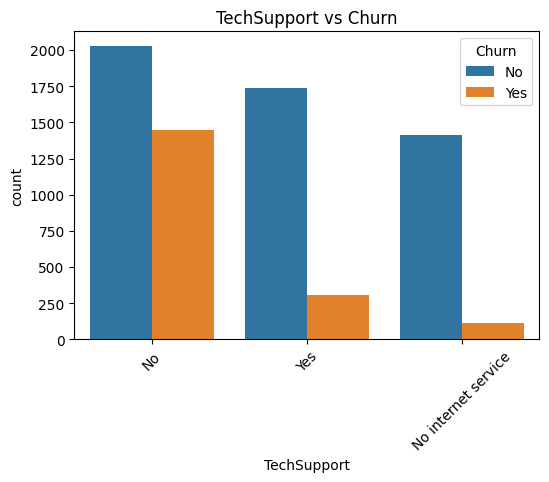

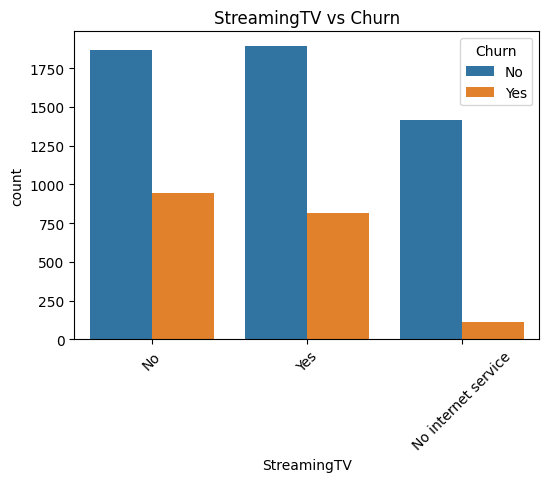

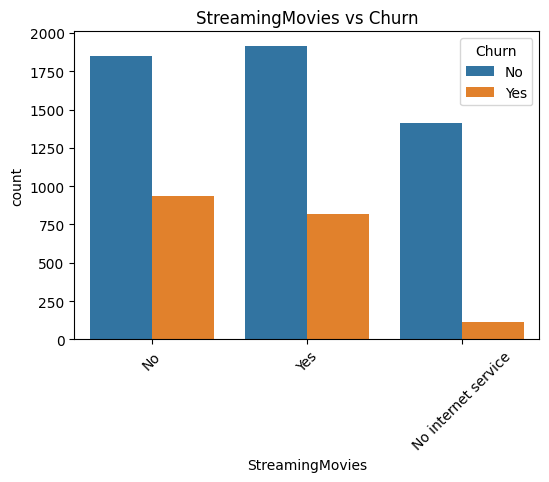

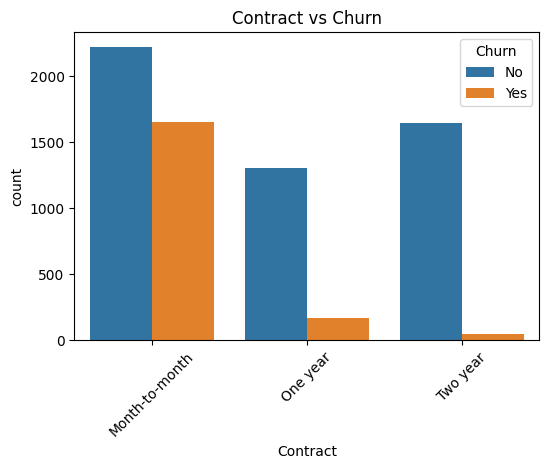

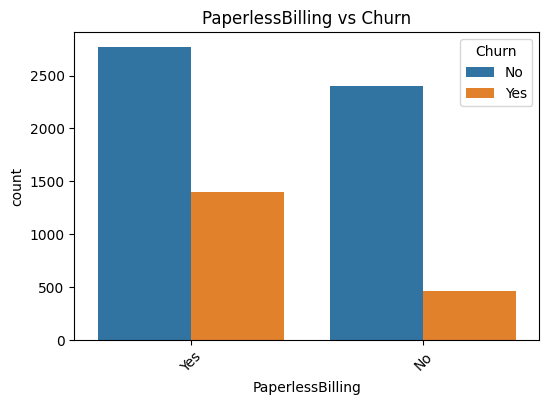

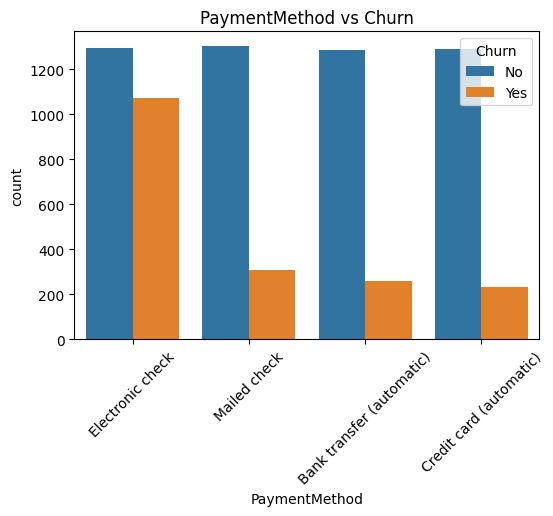

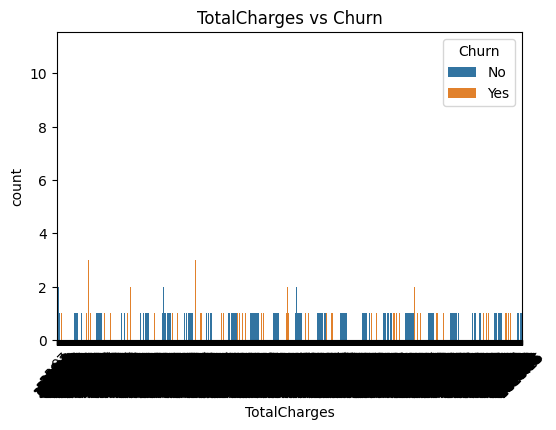

In [3]:
# 01_EDA.ipynb

# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For file upload in Google Colab
from google.colab import files

# ========================
# 2. Upload Dataset
# ========================
print("📂 Please upload your dataset (CSV file)")
uploaded = files.upload()

# Get the first uploaded file name
file_name = list(uploaded.keys())[0]

# Read the uploaded CSV
df = pd.read_csv(file_name)

# ========================
# 3. Quick Overview
# ========================
print("Dataset Shape:", df.shape)
display(df.head())

# Missing values check
print("\nMissing Values:\n", df.isnull().sum())

# Data types
print("\nData Types:")
df.info()

# ========================
# 4. Descriptive Statistics
# ========================
display(df.describe())

# ========================
# 5. Univariate Analysis
# ========================
# Target variable distribution
if "Churn" in df.columns:
    sns.countplot(x="Churn", data=df)
    plt.title("Churn Distribution")
    plt.show()

    # Numerical features
    df.hist(figsize=(12, 8))
    plt.show()

    # ========================
    # 6. Correlation Heatmap
    # ========================
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

    # ========================
    # 7. Categorical Analysis
    # ========================
    for col in df.select_dtypes(include="object").columns:
        if col != "Churn":  # Skip target variable if it's categorical
            plt.figure(figsize=(6,4))
            sns.countplot(x=col, hue="Churn", data=df)
            plt.title(f"{col} vs Churn")
            plt.xticks(rotation=45)
            plt.show()